# Anopheles genomes phylogenetic scaffolding notebook

1. Yoann Aselmetti
2. Severine Berard
3. Eric Tannier
4. Cedric Chauve, Department of Mathematics, Simon Fraser University, cedric.chauve@sfu.ca

## Introduction

This notebook describes an improvement of the assembly of several mosquito genomes of the genus *Anopheles* using the newly developed phylogenetic scaffolding methods DeClone and ADseq.

In [1]:
import sys, math, numpy as np
%matplotlib inline  
import matplotlib, matplotlib.pyplot as plt

sys.path.insert(0, './scripts')
from declone_aux import *
from plotting import *

In [58]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Material and methods

In [2]:
# Reading the genes file
GENES_import(read_tab_file("./data/anopheles_genes_filtered"))
OG_import(read_tab_file("./data/anopheles_genes_filtered"))
GENOMES_import(read_tab_file("./data/anopheles_genes_filtered"))
# Reading the BESST file
BESST_import(read_tab_file("./data/anopheles_besst"))
# Reading the DeClone results file
DECLONE_import(read_tab_file("./results/anopheles_results_01_all"))

In [3]:
# Creating structures to access easily data and results

# Adjacencies
ALL_ADJ=DECLONE_adjacencies_list()
ANC_ADJ=[adj for adj in ALL_ADJ if DECLONE_adj_species_name(adj)=="ANCESTRAL"]
EXTANT_ADJ=[adj for adj in ALL_ADJ if DECLONE_adj_species_name(adj)!="ANCESTRAL"]
SCAFF_ADJ=[adj for adj in EXTANT_ADJ if DECLONE_adj_score(adj)<1.0]
# Species
__ALL_SP_AUX={}
for adj in ALL_ADJ:
    __ALL_SP_AUX[(DECLONE_adj_species_id(adj),DECLONE_adj_species_name(adj))]=1
ALL_SPECIES=[sp for sp in __ALL_SP_AUX.keys()]
EXTANT_SPECIES=[sp for sp in ALL_SPECIES if sp[1]!="ANCESTRAL"]
ANC_SPECIES=[sp for sp in ALL_SPECIES if sp[1]=="ANCESTRAL"]

### Material

*Species tree (figure below), genes, chromosomes/scaffolds/contigs, gene families/orthogroups, gene trees*

![Species tree](images/anopheles_species_tree_labeled.png "*Anopheles* species tree")

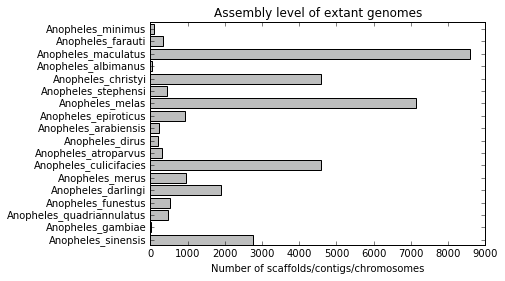

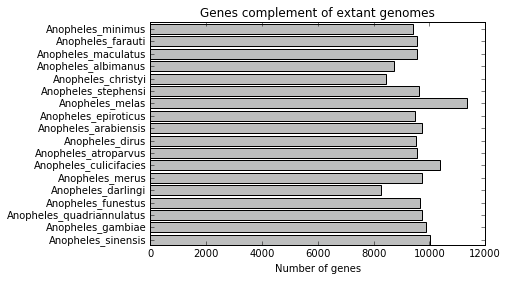

In [4]:
# Plotting the fragmentation and number of genes of each genome
GENOMES_EXTANT_FRAGMENTATION={sp[1]: {0: GENOMES_nbscf(sp[1])} for sp in EXTANT_SPECIES}
xlabel = "Number of scaffolds/contigs/chromosomes"
title  = "Assembly level of extant genomes"
plot_scores_distribution_per_species(GENOMES_EXTANT_FRAGMENTATION, 1, 0.5, xlabel, title,0.8)

GENOMES_EXTANT_NBGENES={sp[1]: {0: GENOMES_nbgenes(sp[1])} for sp in EXTANT_SPECIES}
xlabel = "Number of genes"
title  = "Genes complement of extant genomes"
plot_scores_distribution_per_species(GENOMES_EXTANT_NBGENES, 1, 0.5, xlabel, title,0.8)

### Methods

*ProfileNJ, DeClone, ADSeq, ideally joined into a single tool*

## Results

We now describe the results of our analysis, both in terms of scaffolding of extant *Anopheles* genomes, with a special focus on the genome *Anopheles funestus*, and of the ancestral genome maps we obtain, and what we can learn from them in terms of the evolution of the *Anopheles* genus.

In [8]:
# Here we record the number of adjacencies and conflicts for all species with adjacencies binned by bins of score 0.1
NB_BINS=10 # Binning the adjacencies by bins of size 0.1: bin i contains adjacencies of score <=0.1*i and < 0.1*(i+1)
IVALUES=range(0,NB_BINS+1)
ALL_ADJ_DISTRIB    = {sp: {t : 0 for t in IVALUES} for sp in ALL_SPECIES}
ANC_ADJ_DISTRIB    = {sp: {t : 0 for t in IVALUES} for sp in ANC_SPECIES}
EXTANT_ADJ_DISTRIB = {sp: {t : 0 for t in IVALUES} for sp in EXTANT_SPECIES}
SCAFF_ADJ_DISTRIB  = {sp: {t : 0 for t in IVALUES} for sp in EXTANT_SPECIES}
for adj in ALL_ADJ: 
    (score,species) = (DECLONE_adj_score(adj), (DECLONE_adj_species_id(adj),DECLONE_adj_species_name(adj)))
    score_bin=math.floor(score*NB_BINS)
    ALL_ADJ_DISTRIB[species][score_bin]+=1
    if species[1]=="ANCESTRAL":
        ANC_ADJ_DISTRIB[species][score_bin]+=1
    else:
        EXTANT_ADJ_DISTRIB[species][score_bin]+=1
        if score<1.0:
            SCAFF_ADJ_DISTRIB[species][score_bin]+=1

### Gene trees

*To do: describe the improvement of the new gene trees, gene content, duplications, ...*

### Scaffolding extant genomes: overview

In this section, we present a general overview of the scaffolding adjacencies inferred by the methods ADseq+DeClone.

species name	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0
Anopheles_funes	81	0	11	12	6	10	2	10	21	333
Anopheles_dirus	23	0	3	0	3	1	1	5	3	66
Anopheles_culic	1124	12	25	132	289	291	149	69	66	3627
Anopheles_atrop	121	24	8	4	1	4	1	1	2	41
Anopheles_chris	902	2	28	53	156	85	123	75	77	3119
Anopheles_steph	59	2	0	4	10	24	4	11	5	255
Anopheles_quadr	115	4	14	11	8	15	12	10	8	240
Anopheles_melas	2873	76	539	616	1302	870	91	394	122	3861
Anopheles_macul	1795	48	164	343	1588	325	55	186	69	5638
Anopheles_merus	216	4	1	5	15	17	24	20	37	583
Anopheles_darli	46	0	3	7	6	16	7	4	46	706
Anopheles_minim	19	0	0	1	1	2	0	0	2	24
Anopheles_farau	21	0	1	1	4	3	2	11	4	181
Anopheles_epiro	231	14	5	8	17	31	13	30	26	601
Anopheles_gambi	0	0	0	0	0	0	0	0	0	0
Anopheles_albim	2	0	0	0	0	0	0	0	0	0
Anopheles_arabi	154	35	27	19	11	6	10	8	10	61
Anopheles_sinen	330	21	66	120	163	201	82	44	68	1552


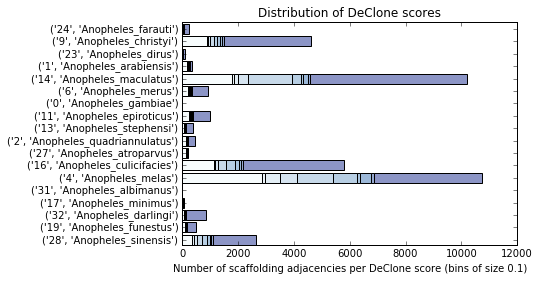

In [22]:
# Filtering for extant scaffolding adjacencies
IVALUES1=range(0,NB_BINS)
# CC: I do not know how to generate a nice table: this is a pis-aller
print("species name\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES1]))
print("\n".join(species[1][0:15]+"\t"+"\t".join(str(SCAFF_ADJ_DISTRIB[species][t]) for t in IVALUES1) for species in EXTANT_SPECIES))
# Figure
xlabel= "Number of scaffolding adjacencies per DeClone score (bins of size "+str(1.0/NB_BINS)+")"
title = "Distribution of DeClone scores"
plot_scores_distribution_per_species(SCAFF_ADJ_DISTRIB, NB_BINS, 1.0, xlabel, title, 0.8)

We can observe on the table and figure above that many adjacencies seem to have a high DeClone score, although for highly fragmented genomes, we can observe a large number of poorly supported adjacencies. 

We now look at the number of conflicts, defined as either a gene with three or more neighbours, without accounting for gene orientation in extant species.

In [51]:
# We now look at the conflicts, again binned in terms of adjacencies score
ANC_CONF_DISTRIB    = {sp: {t : 0 for t in IVALUES} for sp in ANC_SPECIES}
SCAFF_CONF_DISTRIB  = {sp: {t : 0 for t in IVALUES} for sp in EXTANT_SPECIES}
__NGB_ALL={} # Number of neighbours of genes, indexed by pairs (tree,node)
for adj in ALL_ADJ: # Initializing the tables
    gene1=(DECLONE_adj_gene1_tree(adj),DECLONE_adj_gene1_node(adj))
    gene2=(DECLONE_adj_gene2_tree(adj),DECLONE_adj_gene2_node(adj))
    __NGB_ALL[gene1]={t : 0 for t in IVALUES}
    __NGB_ALL[gene2]={t : 0 for t in IVALUES}
for adj in ALL_ADJ: # Filling the tables
    (score,species)=(DECLONE_adj_score(adj),(DECLONE_adj_species_id(adj),DECLONE_adj_species_name(adj)))
    gene1=(DECLONE_adj_gene1_tree(adj),DECLONE_adj_gene1_node(adj))
    gene2=(DECLONE_adj_gene2_tree(adj),DECLONE_adj_gene2_node(adj))
    score_bin=math.floor(score*NB_BINS)
    if __NGB_ALL[gene1][score_bin]>=2 or __NGB_ALL[gene2][score_bin]>=2:
        if species[1]=="ANCESTRAL":
            ANC_CONF_DISTRIB[species][score_bin]+=1
        else:
            SCAFF_CONF_DISTRIB[species][score_bin]+=1
    for i in range (0,score_bin+1):
        __NGB_ALL[gene1][i]+=1
        __NGB_ALL[gene2][i]+=1

species name	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0
Anopheles_funes	39	0	6	4	1	1	0	1	3	7
Anopheles_dirus	11	0	1	0	0	0	0	0	2	3
Anopheles_culic	567	5	12	51	91	84	31	19	16	403
Anopheles_atrop	107	17	4	0	0	0	0	0	0	0
Anopheles_chris	375	0	8	14	39	13	14	10	12	138
Anopheles_steph	20	0	0	1	2	5	0	2	1	5
Anopheles_quadr	67	4	3	0	1	3	3	1	1	11
Anopheles_melas	1688	45	230	234	418	187	16	51	18	288
Anopheles_macul	897	24	53	139	415	104	14	31	16	557
Anopheles_merus	66	1	0	1	5	4	3	2	3	21
Anopheles_darli	14	0	1	2	0	5	0	0	4	7
Anopheles_minim	8	0	0	0	0	0	0	0	0	0
Anopheles_farau	7	0	0	0	0	0	0	1	0	1
Anopheles_epiro	160	7	0	2	0	3	2	4	1	22
Anopheles_gambi	0	0	0	0	0	0	0	0	0	0
Anopheles_albim	0	0	0	0	0	0	0	0	0	0
Anopheles_arabi	129	30	16	9	2	2	2	1	1	3
Anopheles_sinen	134	15	37	44	45	50	8	9	13	55


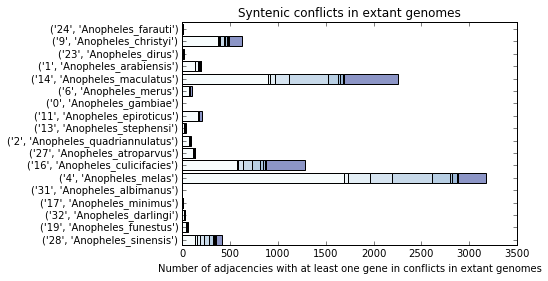

In [52]:
# CC: I do not know how to generate a nice table: this is a pis-aller
print("species name\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES1]))
print("\n".join(species[1][0:15]+"\t"+"\t".join(str(SCAFF_CONF_DISTRIB[species][t]) for t in IVALUES1) for species in EXTANT_SPECIES))
# Figure
xlabel= "Number of adjacencies with at least one gene in conflicts in extant genomes"
title = "Syntenic conflicts in extant genomes"
plot_scores_distribution_per_species(SCAFF_CONF_DISTRIB, NB_BINS, 1.0, xlabel, title,0.8)

### *Anopheles funestus* scaffolding

### Ancestral genomes and evolution

The DeClone/ADseq method infers both extant and ancestral adjacencies, thus paving the way to analyse the evolution of genome organization over the considered species tree.

#### Overview of ancestral adjacencies



We first look at the distribution of scores of ancestral adjacencies and at the number of conflicts.

**Note[CC]** The graph for conflicts looks suspicious, for the column "<1.0".

sp_id	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0	=1.0
15	2131	33	70	64	223	130	108	175	121	10140	579
3	3050	60	70	67	64	69	82	161	224	3683	6543
18	2296	33	56	55	131	113	114	118	111	7339	3746
10	2433	26	89	104	177	182	266	246	172	8619	3233
30	1050	22	100	150	138	191	119	70	57	5331	5153
21	2342	27	54	69	96	131	111	114	111	4794	7207
34	580	12	35	139	93	140	97	63	34	7946	0
22	2230	61	127	117	114	135	148	127	143	4279	8081
12	2424	47	75	125	126	140	151	159	181	5448	6637
20	2370	29	39	62	112	121	85	91	100	4658	6849
7	3749	56	164	156	241	207	235	228	224	6201	5873
29	1435	32	69	70	173	74	121	105	98	5142	4469
26	1657	31	138	169	138	153	107	99	77	4644	7053
8	3744	65	202	224	236	429	204	183	178	5820	6106
33	640	11	25	46	44	59	118	81	107	5547	2938
5	3439	53	92	159	163	225	293	354	275	8950	2652
25	1833	26	107	102	206	98	104	76	69	5115	5468


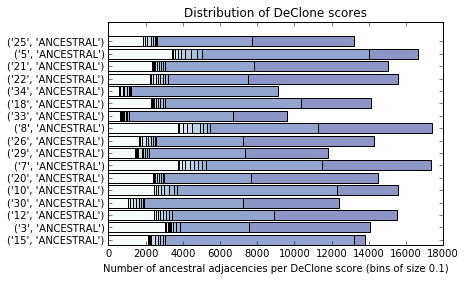

sp_id	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0	=1.0
15	1330	14	38	33	72	55	36	48	37	1265	0
3	1962	36	36	31	29	24	22	33	50	418	0
18	1460	17	27	28	48	60	43	46	37	1262	0
10	1598	15	50	45	79	89	109	80	55	1763	0
30	624	11	45	60	59	76	42	19	18	925	2
21	1536	14	24	37	46	66	51	49	46	1482	22
34	308	4	12	27	27	21	13	5	3	265	0
22	1468	30	57	62	48	61	56	47	52	1397	122
12	1577	25	39	47	46	60	64	56	59	1646	0
20	1538	15	21	31	48	63	39	47	32	1257	0
7	2590	37	87	80	116	88	81	77	65	1414	0
29	805	13	31	26	64	29	30	23	22	450	0
26	1048	19	65	91	62	59	37	36	31	1249	22
8	2608	42	97	91	96	126	74	62	52	1354	0
33	333	5	10	16	17	22	16	10	13	240	0
5	2329	36	49	85	82	100	104	129	86	1375	0
25	1113	19	48	46	74	47	35	25	23	881	1


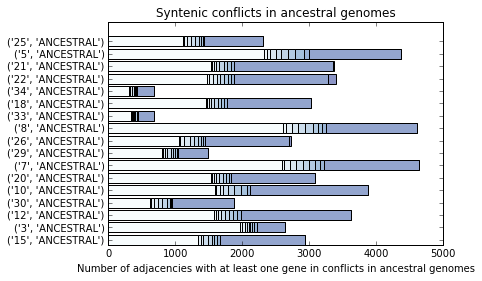

In [57]:
# CC: I do not know how to generate a nice table: this is a pis-aller
print("sp_id\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES1])+"\t=1.0")
print("\n".join(species[0]+"\t"+"\t".join(str(ANC_ADJ_DISTRIB[species][t]) for t in IVALUES) for species in ANC_SPECIES))
# Figure
xlabel= "Number of ancestral adjacencies per DeClone score (bins of size "+str(1.0/NB_BINS)+")"
title = "Distribution of DeClone scores"
plot_scores_distribution_per_species(ANC_ADJ_DISTRIB, NB_BINS+1, 1.0, xlabel, title, 0.8)

# CC: I do not know how to generate a nice table: this is a pis-aller
print("sp_id\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES1])+"\t=1.0")
print("\n".join(species[0]+"\t"+"\t".join(str(ANC_CONF_DISTRIB[species][t]) for t in IVALUES) for species in ANC_SPECIES))
# Figure
xlabel= "Number of adjacencies with at least one gene in conflicts in ancestral genomes"
title = "Syntenic conflicts in ancestral genomes"
plot_scores_distribution_per_species(ANC_CONF_DISTRIB, NB_BINS+1, 1.0, xlabel, title,0.8)

## Discussion

## References